<a href="https://colab.research.google.com/github/SowjanyaKiran/Regression-with-Artificial-Neural-Networks-ANN-/blob/main/Regression_with_Artificial_Neural_Networks_Crab_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split #splits dataset into training/testing.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder # normalizes numerical values for ANN , converts categorical variables into numbers ,
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score , accuracy_score , confusion_matrix , classification_report #for evaluating regression performance.

import tensorflow as tf #
from tensorflow.keras.models import Sequential #Sequential means the model is a linear stack of layers — one layer after another. It’s best when your network flows in a straight line from input → hidden layers → output, without multiple inputs/outputs or layer branches.
from tensorflow.keras.layers import Dense , Dropout #fully connected ANN layers ,prevents overfitting.
from tensorflow.keras.callbacks import EarlyStopping #stops training when validation loss stops improving.

In [2]:
#Loading the dataset
df = pd.read_csv('/content/CrabAgePrediction.csv')

In [3]:
#head and tail of the data set
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
df.tail()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6
3892,I,0.7875,0.6125,0.2125,4.068153,1.502523,1.346601,1.417475,8


In [5]:
#Checking the data types
df.dtypes

,0
Sex,object
Length,float64
Diameter,float64
Height,float64
Weight,float64
Shucked Weight,float64
Viscera Weight,float64
Shell Weight,float64
Age,int64


In [7]:
#Checking for the NULL values
df.isnull().sum().any()

np.False_

In [8]:
#Checking the shape of the dataset
df.shape

(3893, 9)

In [9]:
#Checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [10]:
#checking the describing the data set
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [11]:
#Separate target X and Y
X = df.drop('Age',axis=1)
y = df['Age']

In [12]:
#Checking for the categorical variables
X.select_dtypes('object').columns

Index(['Sex'], dtype='object')

In [13]:
#Dropping categorical variables
if 'Sex' in X.columns:
    X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

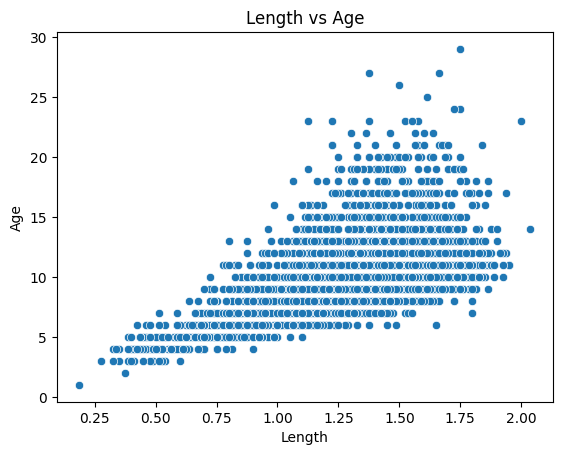

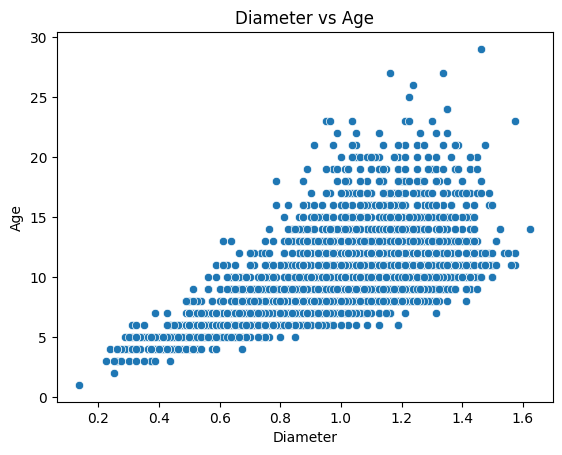

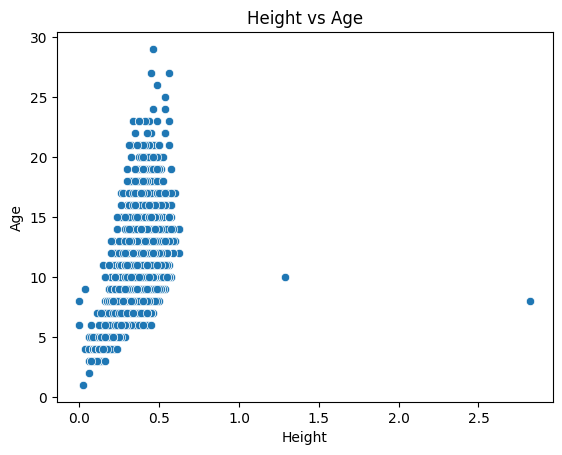

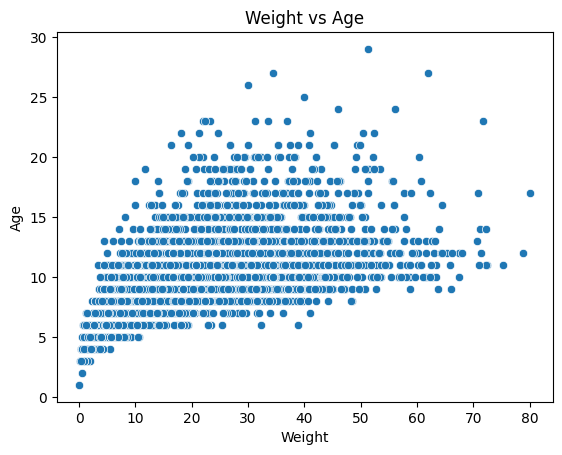

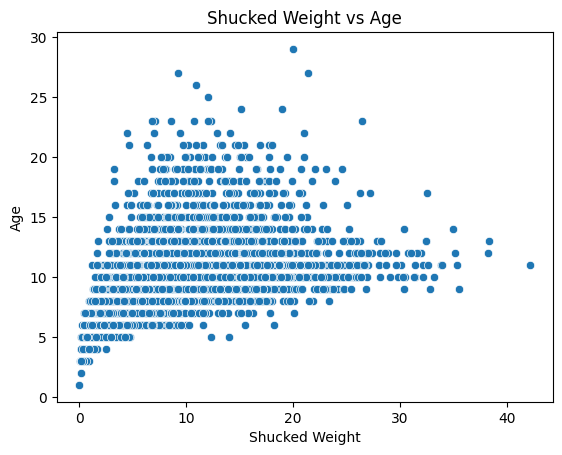

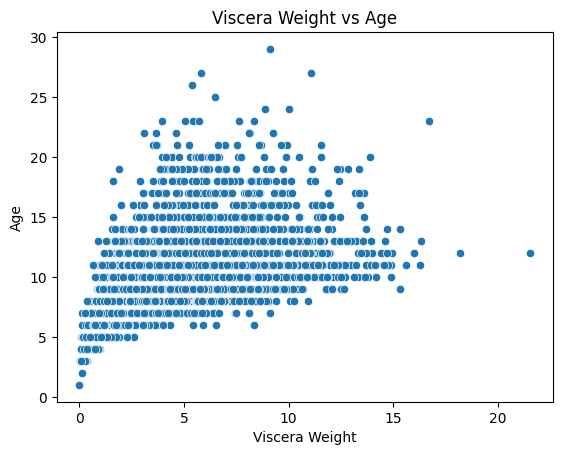

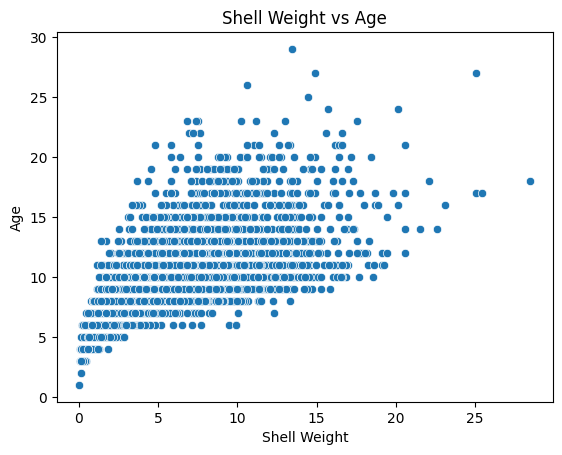

In [16]:
# Relationship between features and target
for col in X.select_dtypes(include=["int64", "float64"]).columns:
    sns.scatterplot(x=df[col], y=y)
    plt.title(f"{col} vs {'Age'}")
    plt.show()

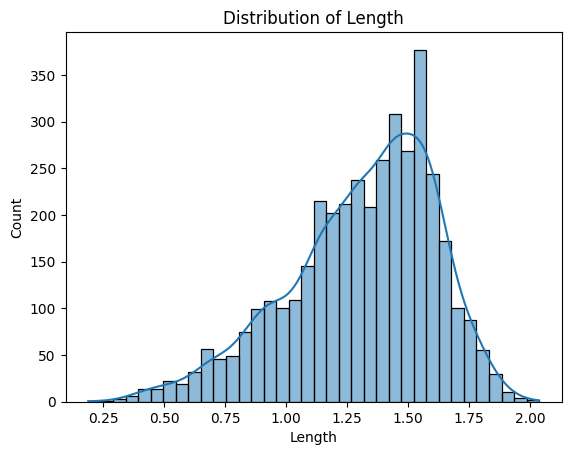

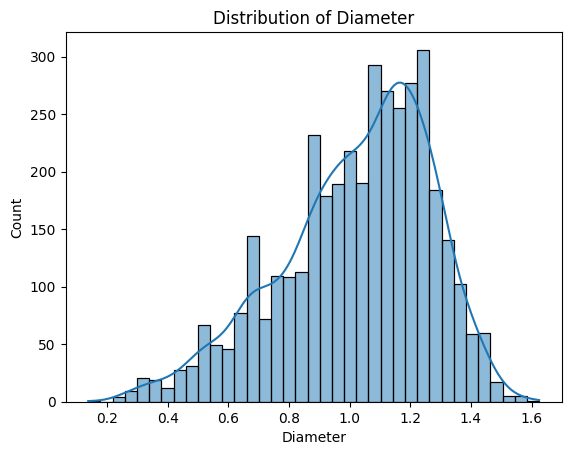

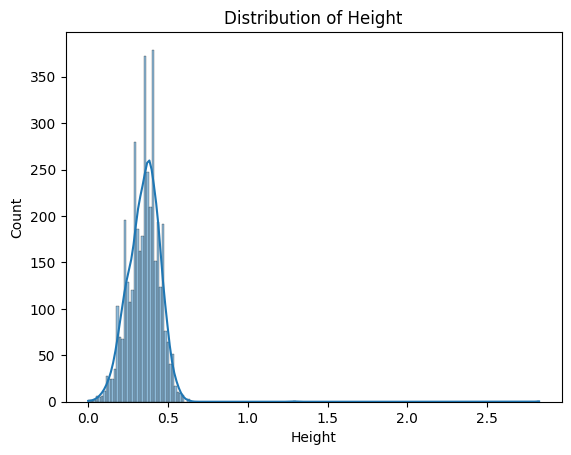

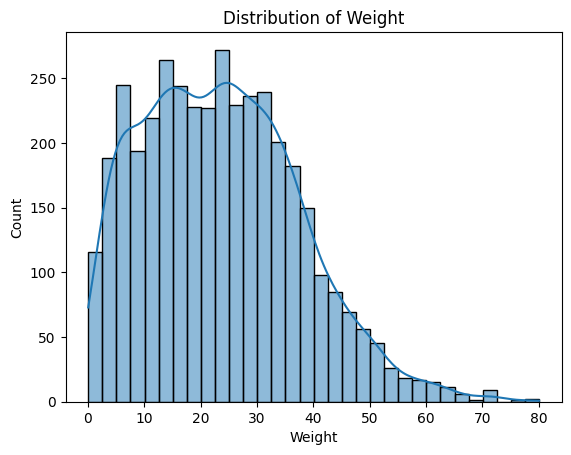

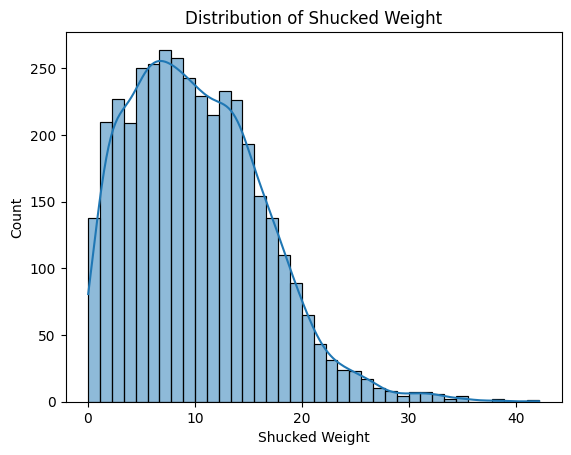

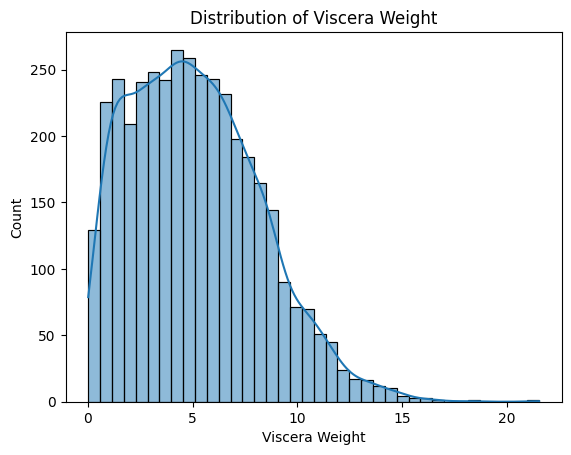

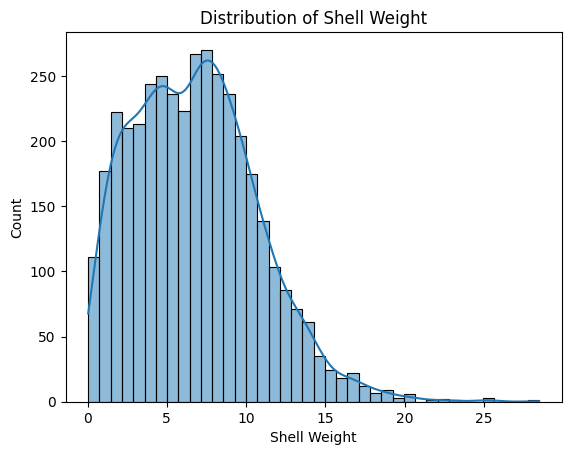

In [17]:
#Distribution plot
for col in X.select_dtypes(include=["int64", "float64"]).columns:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

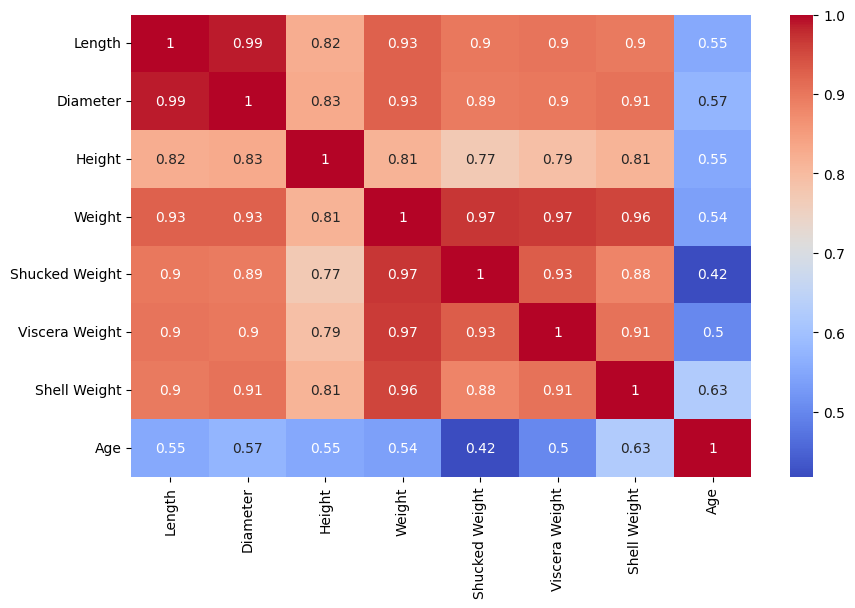

In [20]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [25]:
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [26]:
# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 74.4250 - mae: 7.6914 - val_loss: 12.8970 - val_mae: 2.8006
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0197 - mae: 2.5799 - val_loss: 4.6066 - val_mae: 1.5183
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7585 - mae: 1.7782 - val_loss: 3.9033 - val_mae: 1.4998
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7255 - mae: 1.7745 - val_loss: 3.8113 - val_mae: 1.5004
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.9208 - mae: 1.6794 - val_loss: 3.6095 - val_mae: 1.4401
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.5316 - mae: 1.6648 - val_loss: 3.5667 - val_mae: 1.4359
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4997 - mae: 1.6888 - val_loss: 3.5774 - val_mae: 1.3861
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.8870 - mae: 1.7120 - val_loss: 3.4746 - val_mae: 1.4058
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5

In [29]:
# Evaluate on test set
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE: 4.23890495300293
MAE: 1.4288973808288574
R²: 0.5588820576667786


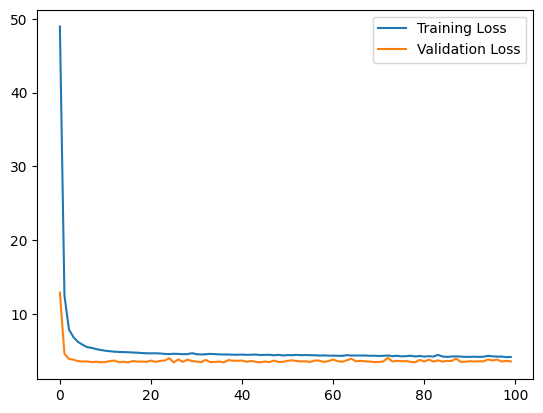

In [31]:
# Loss curves
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

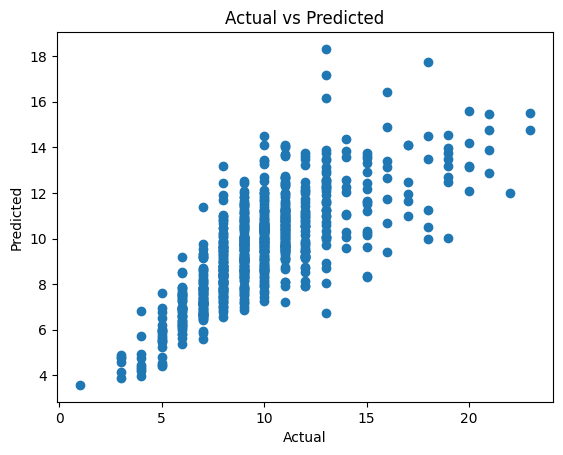

In [32]:
# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Baseline Linear Regression R²:", r2_score(y_test, y_pred))

Baseline Linear Regression R²: 0.5170708365029362
